In [36]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
import datetime as DT

## Useful if the data is not random (should contain trend and seasonality)
### Splits the data into level, trend and seasonality component

In [27]:
airline = pd.read_csv('Data/AirPassengers.csv')

#airline.index = pd.to_datetime(airline.index)

airline['Month'] = pd.to_datetime(airline['Month'])
airline.set_index(airline['Month'])
airline.index = airline['Month']
airline


,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


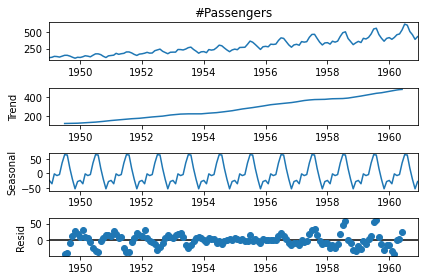

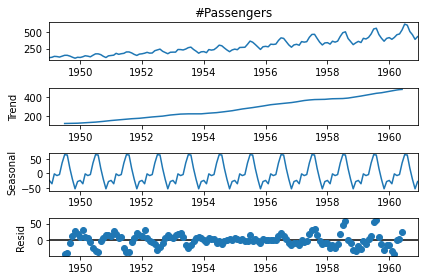

In [28]:
seasonal_decompose(airline['#Passengers']).plot()
#airline['bmi_val']

In [29]:
m = 12
alpha = 1/(2*m)

<AxesSubplot:>

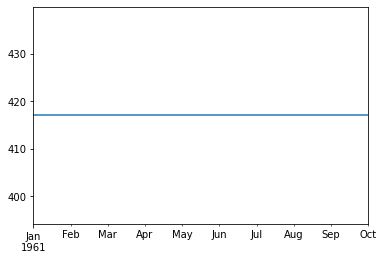

In [43]:
#airline['HWES1'] = SimpleExpSmoothing(airline['#Passengers']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
#airline[['#Passengers','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')
a = SimpleExpSmoothing(airline['#Passengers']).fit(smoothing_level=alpha,optimized=False,use_brute=True)
a.forecast(10).plot()

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Month'>

<Figure size 1152x3600 with 0 Axes>

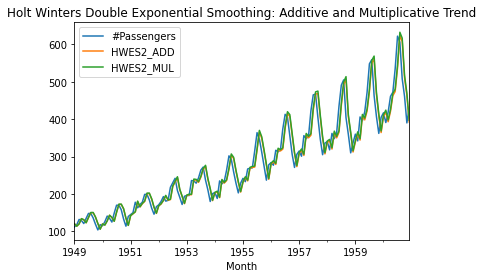

In [35]:
plt.figure(figsize=(16,5))
airline['HWES2_ADD'] = ExponentialSmoothing(airline['#Passengers'],trend='add').fit().fittedvalues
airline['HWES2_MUL'] = ExponentialSmoothing(airline['#Passengers'],trend='mul').fit().fittedvalues
airline[['#Passengers','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='Month'>

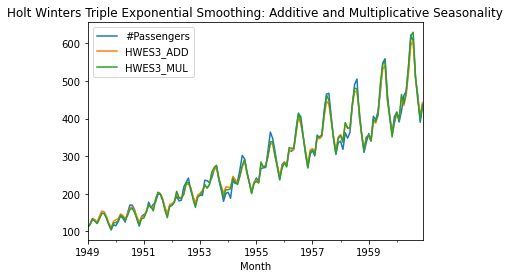

In [33]:
airline['HWES3_ADD'] = ExponentialSmoothing(airline['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline['HWES3_MUL'] = ExponentialSmoothing(airline['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
airline[['#Passengers','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

In [38]:
hot = Holt(airline['#Passengers']).fit()

<AxesSubplot:>

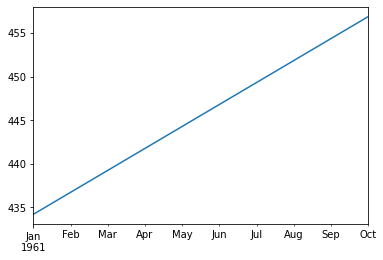

In [44]:
hot.forecast(10).plot()

<AxesSubplot:>

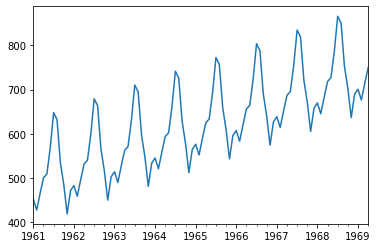

In [48]:
c = ExponentialSmoothing(airline['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
c.forecast(100).plot()

In [3]:
import gzip

In [8]:

a_file = gzip. open('MovieSummaries.tar.gz', 'rb)
contents = a_file. read()
print(contents)

In [10]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [12]:
plots = []

with open("MovieSummaries.tar.gz", 'r') as f:
       reader = csv.reader(f, dialect='excel-tab') 
       for row in tqdm(reader):
            plots.append(row)

0it [00:00, ?it/s]


UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 207: character maps to <undefined>

In [19]:
df = pd.read_csv('Data/energy_dataset.csv')
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [23]:
df1 = df.iloc[0:33311,[0,1]]
df2 = df.iloc[33311:,[0,1]]

In [21]:
35064/20

1753.2

In [22]:
35064-1753

33311

In [29]:
df2.to_csv(path_or_buf='Data/energy_test.csv')